# Interpolation of data
- Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import display, Math

In [3]:
np.random.seed(0)

## 1. Generate data points

In [4]:
x_list = np.linspace(-5,5,21)
data0 = np.array([x_list, 15 + 2.4*x_list -0.5*x_list**2 -0.35*x_list**3])
data = np.array([data0[0] + 0.25 * (2*np.random.rand(21)-1), data0[1] + 5.0 * (2*np.random.rand(21)-1)])

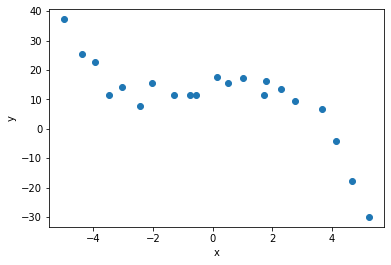

In [5]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0], data[1])

## 2. Fitting a model function

Finding parameters of a model function such that error is minimized.

### 2.1 Define model function

Consider the following polynomial:
$$f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3$$

In [6]:
def polynomial_model(x, a):
    return a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3

Let's test our new function

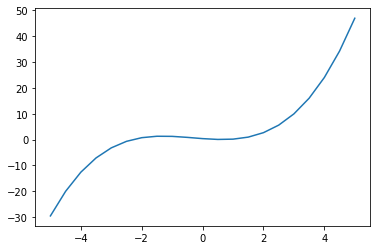

In [7]:
# Starting values for the coefficients
a = 2 * np.random.rand(4) - 1
a
plt.plot(x_list, polynomial_model(x_list, a))

### 2.2 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients $$a_i$$ will be updated along the gradient direction of the error function 
$$\nabla_{\vec{a}} \Delta$$


The gradient consists of elements


\begin{equation}
    \frac{\partial}{\partial a_k} \Delta = 2 \sum_{i=1}^n \left(f(x_i)-y_i\right) \frac{\partial}{\partial a_k}f(x_i) = 2 \sum_{i=1}^n \left(f(x_i)-y_i\right) x_i^{k}
\end{equation}

Remember: 
\begin{equation}
\Delta = \sum_{i=1}^n \left(f(x_i)-y_i\right)^2 = \sum_{i=1}^n \left(a_0 + a_1 x_i + a_2 x_i^2 + \dots + a_n x_i^n-y_i\right)^2\\
\end{equation}

In [8]:
def error_fit_gradient(f, coeff, data):
    derived_delta = 2 * np.array([
        np.sum( (f(data[0,:], coeff) - data[1,:]) * data[0, :]**k) 
    for k in range(4)])
    
    return derived_delta

In [9]:
error_fit_gradient(polynomial_model, a, data)

array([ -274.96086574,  3260.19590312,  1033.60781245, 71705.53934111])

### 2.3 Loop for the actual fitting

In [10]:
print(a)

[ 0.39526239 -0.87954906  0.33353343  0.34127574]


In [11]:
iterations = 100000
h = 0.00001

for i in range(iterations):
    a = a - h * error_fit_gradient(polynomial_model, a, data)

polynomial with parameters
$$f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3$$

In [12]:
print(a)

[14.13819122  2.5169182  -0.29951166 -0.34150612]


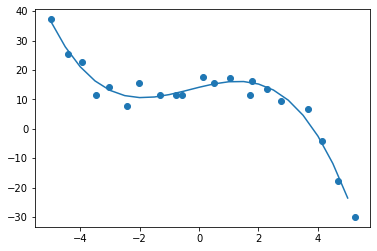

In [13]:
plt.scatter(data[0], data[1])
plt.plot(x_list, polynomial_model(x_list, a))